In [422]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [423]:
df=pd.read_csv("titanic.csv")

#importing the csv file

In [424]:
df.head() # analysing the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [425]:
df.isnull().sum() # looking for null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [426]:
df.shape # shows the no of rows and columns

(891, 12)

In [427]:
df['Embarked'].mode() # S is the mode

0    S
dtype: object

In [428]:
df['Embarked'].fillna("S",inplace = True) #replacing null values with S as it is the mode

In [429]:
df['Embarked'].unique() # checking 

array(['S', 'C', 'Q'], dtype=object)

In [430]:
df.isnull().sum() #checking null values again

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

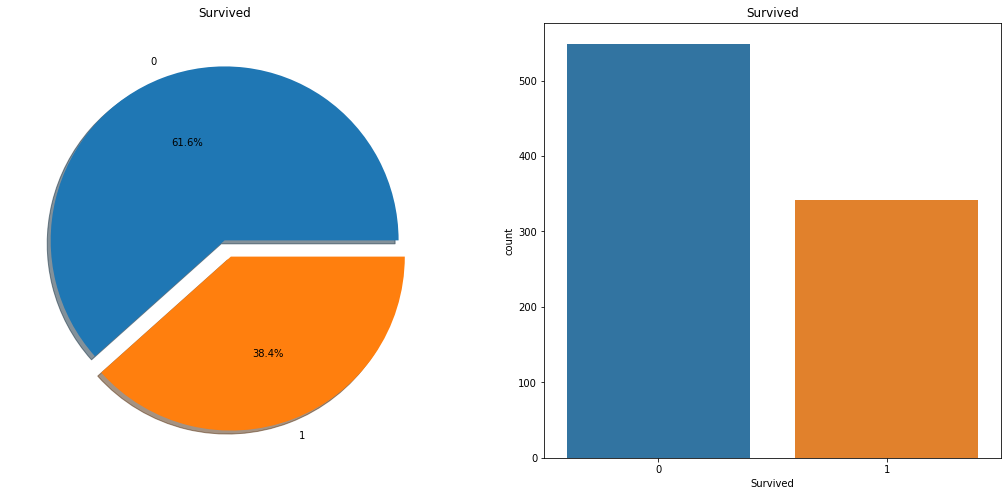

In [431]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

We can see that only 38.4% of people have survived

In [432]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Above table shows Male and female that have survived and dead. We can see that maximun of females have survived compared to male

In [433]:
df.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

we can see that survivors in Pclass 1 are more when compared to other classes. 

In [434]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Null values in Age can be replaced with mean of age column. But if the mean is 30, we cannot assign this to a 6 year old child.
So we can instead replace null values by grouping into different ages and assigning the mean accordingly

In [435]:
df['In']=df.Name.str.extract('([A-Za-z]+)\.') 

In [436]:
df['In'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

we can see that few initials are missplelt. We now should correct them by replacing them with the right ones

In [437]:
#Replacing the Initials
df['In'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [438]:
df["In"].unique() # after replacing

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [439]:
df.groupby('In')['Age'].mean() # mean of age based on initials

In
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [440]:
#Filling null values in age based on initials
df.loc[(df.Age.isnull())&(df.In=='Master'),'Age']=4.574167
df.loc[(df.Age.isnull())&(df.In=='Miss'),'Age']=21.860000
df.loc[(df.Age.isnull())&(df.In=='Mr'),'Age']=32.739609
df.loc[(df.Age.isnull())&(df.In=='Mrs'),'Age']=35.981818
df.loc[(df.Age.isnull())&(df.In=='Other'),'Age']=45.888889

In [441]:
df.isnull().sum() # we can see that all null values in Age are replaced

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
In               0
dtype: int64

In [442]:
df["Embarked"].unique() # There are three catagories in Embarked

array(['S', 'C', 'Q'], dtype=object)

In [443]:
df.groupby(['Embarked','Survived'])['Survived'].count() # grouping survived by embarked

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           219
Name: Survived, dtype: int64

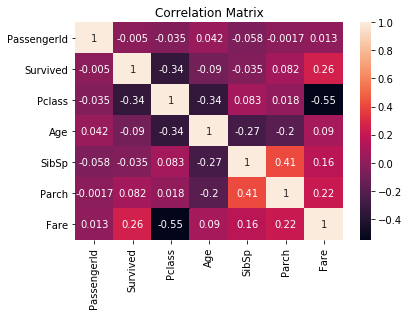

In [444]:
import matplotlib.pylab as plt

#checking Correaltion
corr_mat=df.corr()
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

from the above heatmap,we can see that the features are not much correlated. The highest correlation is between SibSp and Parch i.e 0.41. So we can carry on with all features.

Grouping of Age

In [445]:
df['Age_band']=0
df.loc[df['Age']<=16,'Age_band']=0
df.loc[(df['Age']>16)&(df['Age']<=32),'Age_band']=1
df.loc[(df['Age']>32)&(df['Age']<=48),'Age_band']=2
df.loc[(df['Age']>48)&(df['Age']<=64),'Age_band']=3
df.loc[df['Age']>64,'Age_band']=4


In [446]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,In,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


Grouping of fares

In [447]:
df['Fare_grp']=pd.qcut(df['Fare'],4)
df.groupby(['Fare_grp'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')


,Survived
Fare_grp,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [448]:
# converting into catagaries similar to Age_Band
df['Fare_G']=0
df.loc[df['Fare']<=7.91,'Fare_G']=0
df.loc[(df['Fare']>7.91)&(df['Fare']<=14.454),'Fare_G']=1
df.loc[(df['Fare']>14.454)&(df['Fare']<=31),'Fare_G']=2
df.loc[(df['Fare']>31)&(df['Fare']<=513),'Fare_G']=3

In [449]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,In,Age_band,Fare_grp,Fare_G
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,"(7.91, 14.454]",1


Converting catagorical variables to numerical 

In [450]:
df['Sex'].replace(['male','female'],[0,1],inplace=True)
df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
df['In'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [451]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,In,Age_band,Fare_grp,Fare_G
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,2,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,2,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,2,"(7.91, 14.454]",1


Dropping the columns (Name,Age,Ticket,Fare.Cabin,Fare_Range,PassengerId) which are not needed

In [452]:
df.drop(['Name','Age','Ticket','Fare','Cabin','Fare_grp','PassengerId'],axis=1,inplace=True)

In [453]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,In,Age_band,Fare_G
0,0,3,0,1,0,0,0,1,0
1,1,1,1,1,0,1,1,2,3
2,1,3,1,0,0,0,2,1,1
3,1,1,1,1,0,0,1,2,3
4,0,3,0,0,0,0,0,2,1


# Data Modeling and prediciton

In [454]:
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from  sklearn.naive_bayes import GaussianNB
from  sklearn.svm import SVC
from  sklearn.ensemble import RandomForestClassifier
from  sklearn.ensemble import AdaBoostClassifier
from  sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from  sklearn.preprocessing import MinMaxScaler
from  sklearn.model_selection import train_test_split
from  sklearn.preprocessing import PowerTransformer
from  sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import joblib
import warnings
warnings.filterwarnings('ignore')

In [455]:
# Separating independent and target variables in 'x' & 'y'
x=df[df.columns[1:]]
y=df['Survived']

In [456]:
#splitting into training and testing data set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=22,random_state=43)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(869, 8)
(22, 8)
(869,)
(22,)


In [457]:
# LogisticRegression, GaussianNB, Supportvectorclassifier, RandomForestClassifier, AdaBoostClassifier
lg=LogisticRegression()
gnb=GaussianNB()
sv=SVC()
rf=RandomForestClassifier(n_estimators=100)
ad=AdaBoostClassifier(n_estimators=100)
knn=KNeighborsClassifier() 


In [458]:
model=[lg,gnb,sv,rf,ad,knn]

for m in model:
    m.fit(x_train,y_train)
    predict=m.predict(x_test)
    print('accuracy score of:',m)
    print(accuracy_score(y_test,predict))
    print(confusion_matrix(y_test,predict))
    print(classification_report(y_test,predict))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())

accuracy score of: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.8636363636363636
[[12  0]
 [ 3  7]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       1.00      0.70      0.82        10

    accuracy                           0.86        22
   macro avg       0.90      0.85      0.86        22
weighted avg       0.89      0.86      0.86        22

[0.79888268 0.81460674 0.79775281 0.79775281 0.80898876]
0.8035967610319503
accuracy score of: GaussianNB(priors=None, var_smoothing=1e-09)
0.8636363636363636
[[11  1]
 [ 2  8]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
   

CrossValidation

In [459]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['lg','gnb','sv','rf','ad','knn']
models=[lg,gnb,sv,rf,ad,knn]
for i in models:
    model = i
    cv_result = cross_val_score(model,x,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
lg,0.799126,0.025127
gnb,0.804719,0.031819
sv,0.829401,0.036872
rf,0.817079,0.036832
ad,0.810337,0.035619
knn,0.792409,0.036381


In [460]:
from sklearn import svm, datasets

from sklearn.model_selection import GridSearchCV
parameters = {'kernel':['linear','rbf','poly'],'C':[1,10]}
svc=svm.SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x_train,y_train)

sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [461]:
print(clf.best_params_)

{'C': 1, 'kernel': 'rbf'}


With default parameters SVC and Adaboost have maximum accuracy when compared to other models. 

In [462]:
import joblib
joblib.dump(sv,'Titanic problem svc.obj') #save the model as object file


['Titanic problem svc.obj']

In [463]:
joblib.dump(ad,'Titanic problem adaboost.obj') #save the model as object file

['Titanic problem adaboost.obj']